# Лаба №1: интерполирование функции с помощью _Полиномов Лагранжа_
## Ну я думаю было бы хайпово так же добавить чушню с помощью полиномов Ньютона, барицентрического Лагранжа

Мы вот значит короче сначала импортируем сигма слово пацана либы чтобы просто разматать эту задачку 

In [17]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### И прежде всего мы запрограммируем функции, которые потребуются для вычисления ряда в точке с заданой точностью

In [11]:
def q_n(x, n):
    numerator = x * x * (2 * n + 1)
    denominator = (n + 1) * (2 * n + 3)

    return -numerator / denominator


def erf(x, precision=1e-6):
    a_i = x
    result = a_i
    n = 0

    while abs(a_i) > precision:
        a_i *= q_n(x, n)
        result += a_i
        n += 1

    return (2 / math.pi ** .5) * result

### Проверим, действительно ли функция высчитывает значения ряда с точностью 1e-6

In [16]:
assert abs(erf(0.2) - 0.222702) <= 1e-6, "erf(0.2) incorrect"
assert abs(erf(0.6) - 0.603856) <= 1e-6, "erf(0.6) incorrect"
assert abs(erf(0.8) - 0.74210) <= 1e-6, "erf(0.8) incorrect"

### Теперь перед нами стоит задача протабулировать отрезок на 11 частей и вычислить значение функции в этих точках. Затем на нечетных построить полином

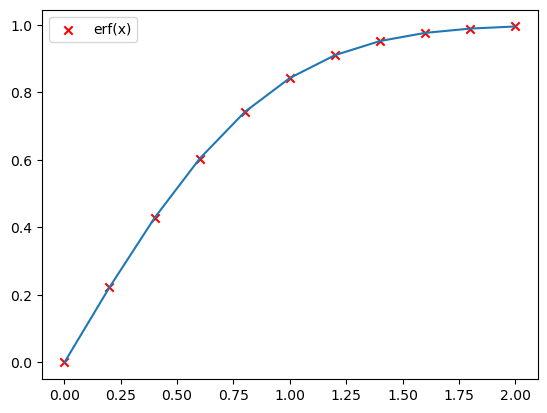

In [57]:
a = 0
b = 2
m = 11
n = m // 2 + m % 2

indices = np.linspace(a, b, m)
dots = [erf(i) for i in indices]
train_dots = dots[::2]
test_dots = dots[1::2]

plt.plot(indices, dots)
plt.scatter(indices, dots, label='erf(x)', marker='x', color='red')
plt.legend()

### Напишем интерполяционные полиномы

In [60]:
def lagrange(x, dots=train_dots, indices=indices[::2]):
    result = 0
    for i in range(len(indices)):
        temp = 1
        for j in range(len(indices)):
            if i == j:
                continue

            temp *= (x - indices[j]) / (indices[i] - indices[j])

        result += temp * dots[i]

    return result


### Несколько простых тестов
Прикол в том, что если в одной из тестовых точек (те в той, через которую _*проходит*_ полином) значение отличается от реального, то у нас что-то более чем аблосютно явно не так

In [87]:
delta = [abs(train_dots[i] - lagrange(indices[2 * i])) for i in range(len(train_dots))]
if max(delta) > 0:
    plt.bar(indices[::2], delta, label='lagrange')

assert max(
    delta) < 1e-6, "train dot not equals"  # Из-за бед с плавающей точек может быть небольшая погрешность, поэтому оцениваем по 1e-6

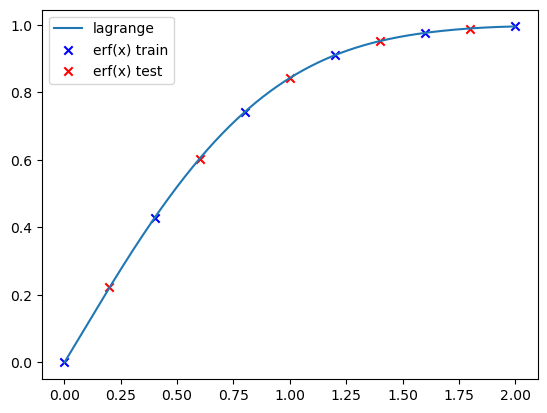

In [68]:
axis = np.linspace(a, b, 1000)
polynom_res = [lagrange(x) for x in axis]

plt.plot(axis, polynom_res, label='lagrange')
plt.scatter(indices[::2], train_dots, label='erf(x) train', marker='x', color='blue')
plt.scatter(indices[1::2], test_dots, label='erf(x) test', marker='x', color='red')
plt.legend()

0.0006965558257726878

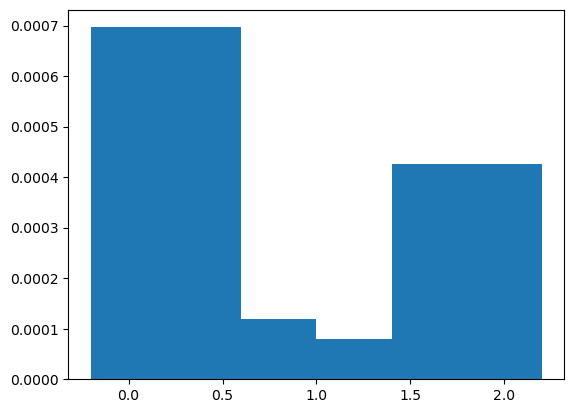

In [74]:
delta = [abs(test_dots[i] - lagrange(indices[2 * i + 1])) for i in range(len(test_dots))]
plt.bar(indices[1::2], delta, label='lagrange')
max(delta)